In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\balaji\Python\movies.csv")

In [3]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [4]:
movies.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [6]:
movies.shape

(1465, 11)

In [7]:
movies["id"].nunique()  # Unique movie IDs

1465

In [8]:
movies["director_id"].nunique()  # Unique director IDs

199

In [9]:
directors = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\balaji\Python\directors.csv')

In [10]:
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [11]:
directors.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
directors["id"].nunique() 

2349

In [13]:
np.all(movies['director_id'].isin(directors['id'])) 

True

In [14]:
df = movies.merge(directors,how = "left",left_on = "director_id", right_on = "id",)

In [15]:
df.drop(["director_id","id_y"], axis=1, inplace=True)

In [16]:
df.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [17]:
df.rename(columns={"id_x": "movie_id"}, inplace=True)

In [18]:
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 137.5+ KB


In [20]:
df.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


In [21]:
df[df["revenue"]==0].shape

(195, 12)

In [22]:
df[df["budget"]==0].shape

(136, 12)

In [23]:
df.describe (include = "object")

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Avatar,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


In [24]:
df['director_name'].value_counts().head(10)

director_name
Steven Spielberg     26
Martin Scorsese      19
Clint Eastwood       19
Woody Allen          18
Ridley Scott         16
Spike Lee            16
Robert Rodriguez     16
Renny Harlin         15
Steven Soderbergh    15
Tim Burton           14
Name: count, dtype: int64

In [25]:
df['director_name'].value_counts().tail(10)

director_name
Rod Lurie             5
Michael Apted         5
Jean-Pierre Jeunet    5
Kenny Ortega          5
Robert Redford        5
Tim Hill              5
Jonathan Liebesman    5
Roman Polanski        5
Larry Charles         5
Nicole Holofcener     5
Name: count, dtype: int64

In [26]:
df['revenue'] = (df['revenue']/1000000).round(2)
df['budget'] = (df['budget']/1000000).round(2)

In [27]:
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [28]:
df['profit_margin'] = df['revenue'] - df['budget']
df['profit_margin%'] = (df['profit_margin'] / df['revenue']) * 100

In [29]:
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,profit_margin%
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550.97,91.499191
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,661.00,68.782518
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,635.67,72.180272
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,834.94,76.957251
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,632.87,71.039546


In [30]:
df[~(df["revenue"]==0) | (df["budget"]==0)]

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,profit_margin%
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550.97,91.499191
1,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,661.00,68.782518
2,43599,245.00,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,635.67,72.180272
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,834.94,76.957251
4,43602,258.00,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,632.87,71.039546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0.00,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,0.32,100.000000
1461,48370,0.03,19,3.15,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,3.12,99.047619
1462,48375,0.00,7,0.00,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,0.00,NaN
1463,48376,0.00,3,0.00,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,0.00,NaN


In [31]:
df= df[~(df["revenue"]==0) | (df["budget"]==0)]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        1375 non-null   int64  
 1   budget          1375 non-null   float64
 2   popularity      1375 non-null   int64  
 3   revenue         1375 non-null   float64
 4   title           1375 non-null   object 
 5   vote_average    1375 non-null   float64
 6   vote_count      1375 non-null   int64  
 7   year            1375 non-null   int64  
 8   month           1375 non-null   object 
 9   day             1375 non-null   object 
 10  director_name   1375 non-null   object 
 11  gender          1261 non-null   object 
 12  profit_margin   1375 non-null   float64
 13  profit_margin%  1269 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 161.1+ KB


In [33]:
df.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,profit_margin%
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1269.000000
mean,45185.957091,49.430996,32.127273,152.630575,6.388655,1207.090182,2002.750545,103.199578,-72.494564
std,1183.834074,50.351427,35.537162,209.760852,0.806642,1609.400835,8.639953,177.851148,2826.071166
min,43597.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1976.000000,-165.710000,-99900.000000
25%,44184.500000,15.000000,12.000000,25.790000,5.900000,252.000000,1998.000000,0.835000,25.688926
50%,44975.000000,35.000000,24.000000,88.920000,6.400000,632.000000,2004.000000,47.090000,62.552427
75%,45932.500000,70.000000,42.000000,187.430000,7.000000,1476.500000,2009.000000,132.700000,79.002625
max,48395.000000,380.000000,724.000000,2787.970000,8.300000,13752.000000,2016.000000,2550.970000,100.000000


In [34]:
df_profitable_latest_budget =  df[(df['budget'] <= 100) & (df['profit_margin'] > 0) & (df['year'] >= 2010)]

In [35]:
df_profitable_latest_budget['director_name'].value_counts().head(10)   

director_name
Tim Story             4
Dennis Dugan          4
Clint Eastwood        4
David O. Russell      4
Steven Soderbergh     4
Nicholas Stoller      4
Jaume Collet-Serra    4
Steven Spielberg      3
John Madden           3
Danny Boyle           3
Name: count, dtype: int64

In [36]:
(df_profitable_latest_budget[(df_profitable_latest_budget['vote_average']>= 6)
 & (df_profitable_latest_budget['profit_margin%']>= 5)])['director_name'].value_counts().head(10)  

director_name
Tim Story             4
Jaume Collet-Serra    4
David O. Russell      4
Adam McKay            3
Lasse Hallström       3
Danny Boyle           3
James Wan             3
Richard Linklater     3
Clint Eastwood        3
David Fincher         3
Name: count, dtype: int64

In [37]:
#we have a list of best directors for the dataset who are profitable ,have good rating,
#have done movies in recent time ,and who might work in optimum budget 

In [38]:
df_profitable_latest_budget[['revenue','budget']].sum()

revenue    24796.47
budget      7784.73
dtype: float64

In [39]:
df_profitable_latest_budget[['revenue','budget']].apply(np.sum,axis=0)

revenue    24796.47
budget      7784.73
dtype: float64

In [40]:
def odd_even(number):
    if number % 2 == 0:
        return "Even"
    else:
        return "Odd"

In [41]:
odd_even = lambda number: "even" if number % 2 == 0 else "odd"
odd_even(8)

'even'

In [42]:
def profit_margin(row):
    revenue = row['revenue']
    budget = row['budget']
    if revenue == 0:
        return 0
    return (revenue - budget) / revenue
 

In [43]:
df_profitable_latest_budget['profit_margin_5'] = df_profitable_latest_budget[['revenue','budget']].apply(profit_margin, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3176\4183878074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profitable_latest_budget['profit_margin_5'] = df_profitable_latest_budget[['revenue','budget']].apply(profit_margin, axis=1)


In [44]:
df_profitable_latest_budget.loc[:,'profit_margin_new'] = df_profitable_latest_budget.apply(
    lambda row: (row['revenue'] - row['budget']) / row['revenue'] if row['revenue'] != 0 else 0, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3176\2113556110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profitable_latest_budget.loc[:,'profit_margin_new'] = df_profitable_latest_budget.apply(


In [45]:
df_profitable_latest_budget

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,profit_margin%,profit_margin_5,profit_margin_new
175,43881,100.0,32,310.65,Little Fockers,5.4,1060,2010,Dec,Tuesday,Paul Weitz,Male,210.65,67.809432,0.678094,0.678094
176,43882,100.0,24,170.43,The Other Guys,6.1,1383,2010,Aug,Friday,Adam McKay,Male,70.43,41.324884,0.413249,0.413249
178,43884,100.0,82,425.37,Django Unchained,7.8,10099,2012,Dec,Tuesday,Quentin Tarantino,Male,325.37,76.491055,0.764911,0.764911
179,43887,100.0,53,312.57,The Expendables 2,6.1,2896,2012,Aug,Wednesday,Simon West,Male,212.57,68.007166,0.680072,0.680072
183,43895,100.0,95,392.00,The Wolf of Wall Street,7.9,6571,2013,Dec,Wednesday,Martin Scorsese,Male,292.00,74.489796,0.744898,0.744898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,47350,4.0,43,44.35,Boyhood,7.5,1971,2014,Jun,Thursday,Richard Linklater,Male,40.35,90.980834,0.909808,0.909808
1391,47515,3.0,23,11.18,Before Midnight,7.4,568,2013,Apr,Friday,Richard Linklater,Male,8.18,73.166369,0.731664,0.731664
1417,47821,1.5,58,97.01,Insidious,6.8,1737,2010,Sep,Monday,James Wan,Male,95.51,98.453768,0.984538,0.984538
1439,48146,0.0,10,0.32,Good Kill,5.9,208,2015,Apr,Thursday,Andrew Niccol,Male,0.32,100.000000,1.000000,1.000000


In [46]:
#groupby in python

df_profitable_latest_budget.groupby('director_name')["budget"].mean()

director_name
Adam McKay                     59.333333
Alejandro González Iñárritu     9.000000
Alexander Payne                16.000000
Andrew Adamson                  0.000000
Andrew Niccol                  28.000000
                                 ...    
Wes Anderson                   23.000000
Wes Craven                     40.000000
Woody Allen                    21.666667
Zack Snyder                    81.000000
Zhang Yimou                    94.000000
Name: budget, Length: 113, dtype: float64

In [47]:
df_after_group = df_profitable_latest_budget.groupby(['year','month'])['movie_id'].agg(["sum","mean"])

In [48]:
df_after_group.loc[:,'sum']

year  month
2010  Apr      135864
      Aug      134809
      Dec      229958
      Feb      267566
      Jan       45330
                ...  
2016  Feb      183152
      Jan       89309
      Jun       90306
      Mar       45922
      May      135036
Name: sum, Length: 71, dtype: int64

In [49]:
#plot a line which is passing through (0,3),(1,5)and (2,9)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

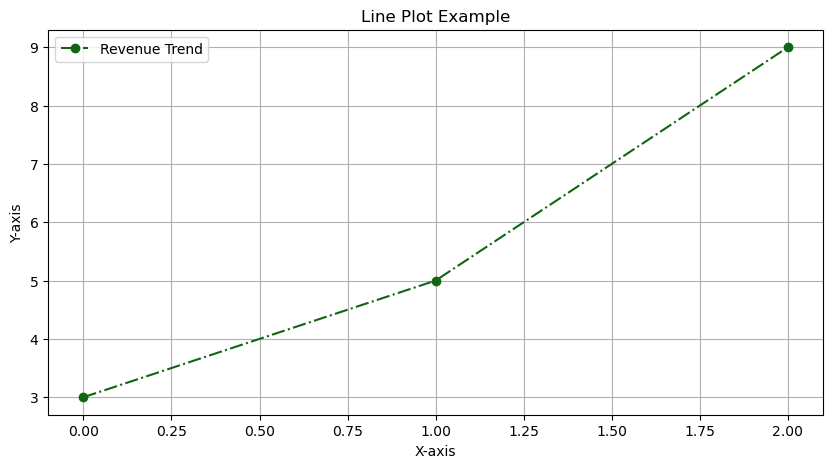

In [51]:
x_values = [0, 1, 2]
y_values = [3, 5, 9]

plt.figure(figsize=(10, 5))

plt.plot(x_values, y_values,color="#106610", marker='o',linestyle='-.', label='Revenue Trend',)

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.title('Line Plot Example')
plt.show()


In [52]:
df.head()  

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,profit_margin%
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550.97,91.499191
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,661.00,68.782518
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,635.67,72.180272
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,834.94,76.957251
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,632.87,71.039546


In [53]:
movies_per_year = df["year"].value_counts().head(10)

In [54]:
movies_per_year

year
2006    70
2005    68
2008    66
2011    66
2002    65
2009    61
2001    60
2010    57
2004    57
2013    55
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_3176\2847218770.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


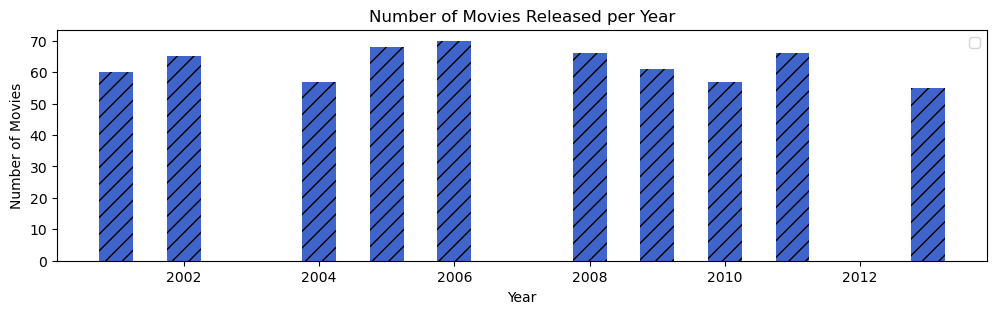

In [55]:
plt.figure(figsize=(12, 3))
plt.bar(movies_per_year.index, movies_per_year.values, color="#3F64CA",width=0.5,hatch='//')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')
plt.show()

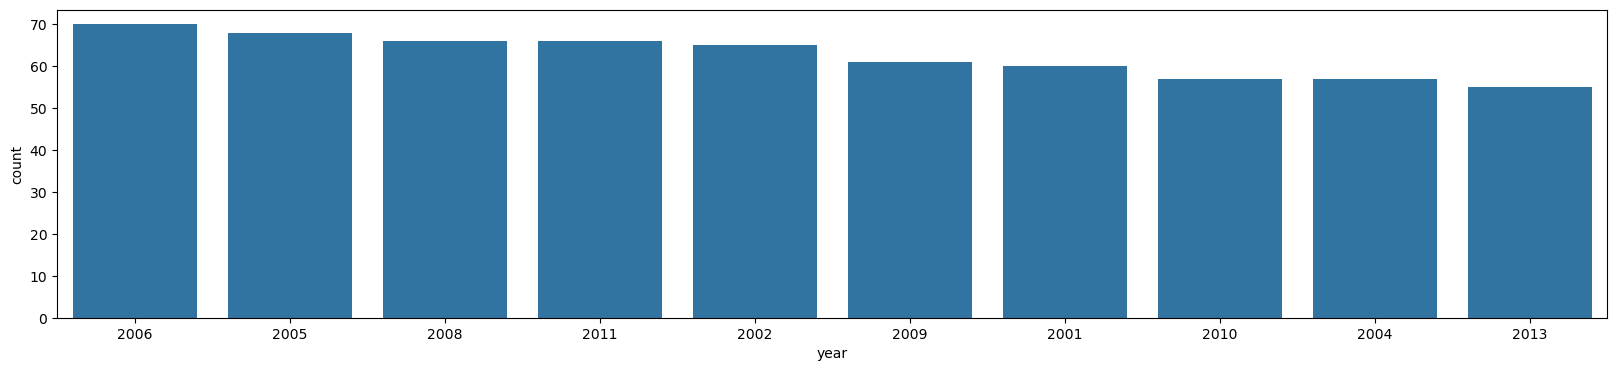

In [56]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df,x='year',order= movies_per_year.index)
plt.show()

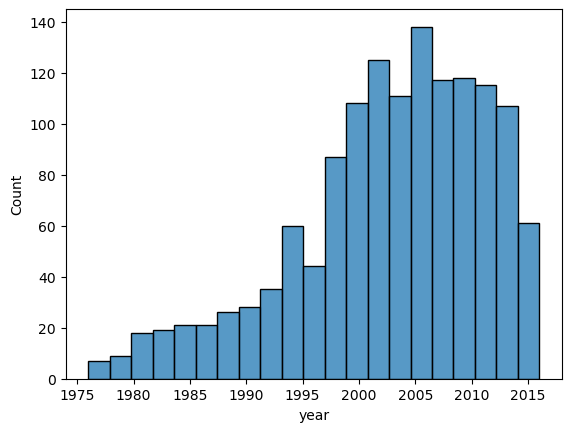

In [57]:
sns.histplot(data = df,x = 'year')  
plt.show()

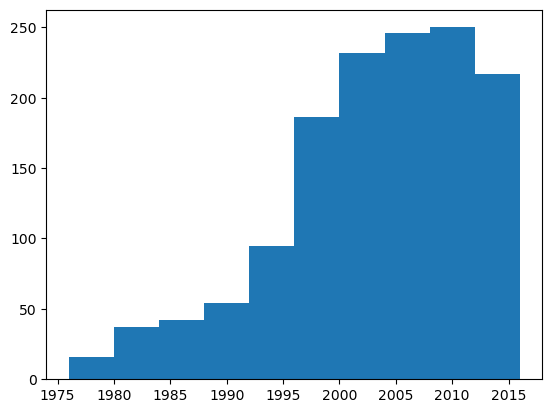

In [58]:
plt.hist(df["year"])  #histogram
plt.show()

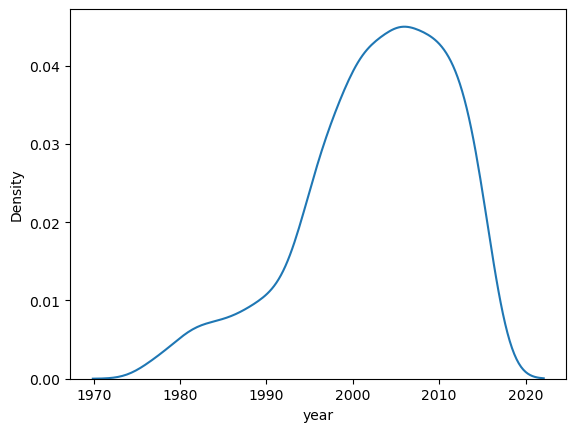

In [59]:
sns.kdeplot(data = df,x = 'year')
plt.show()

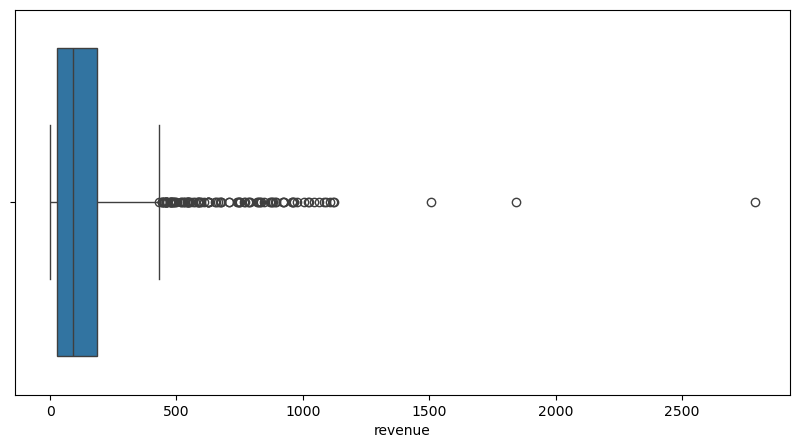

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x= 'revenue')
plt.show()

In [61]:
def analyze_outliers(series):
    q1 = series.quantile(0.25)
    q2 = series.quantile(0.5)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]

    summary = {
        "25th Percentile": q1,
        "50th Percentile": q2,
        "75th Percentile": q3,
        "IQR": iqr,
        "Lower limit": lower_bound,
        "Upper limit": upper_bound,
        "Outliers_count": outliers.size,
        "Outliers list": np.sort(outliers.unique())
    }
    return summary

In [62]:
data = pd.Series([6,5,4,3,2,7,8,50])

In [63]:
analyze_outliers(data)

{'25th Percentile': 3.75,
 '50th Percentile': 5.5,
 '75th Percentile': 7.25,
 'IQR': 3.5,
 'Lower limit': -1.5,
 'Upper limit': 12.5,
 'Outliers_count': 1,
 'Outliers list': array([50], dtype=int64)}

In [64]:
analyze_outliers(df['revenue'])

{'25th Percentile': 25.79,
 '50th Percentile': 88.92,
 '75th Percentile': 187.43,
 'IQR': 161.64000000000001,
 'Lower limit': -216.67000000000004,
 'Upper limit': 429.89000000000004,
 'Outliers_count': 102,
 'Outliers list': array([ 431.97,  441.29,  441.82,  442.82,  449.22,  449.33,  450.72,
         456.76,  457.64,  457.7 ,  459.27,  459.36,  463.  ,  463.52,
         474.17,  474.97,  476.68,  477.2 ,  478.21,  481.84,  484.41,
         484.57,  491.87,  494.47,  497.41,  516.64,  520.  ,  524.03,
         531.86,  532.95,  542.31,  543.51,  543.93,  544.27,  546.39,
         550.  ,  553.8 ,  563.75,  574.48,  585.17,  585.35,  586.09,
         589.39,  591.74,  599.05,  609.02,  623.93,  624.03,  626.14,
         630.16,  653.43,  655.01,  662.85,  672.81,  675.12,  677.95,
         709.71,  709.83,  738.6 ,  745.  ,  747.86,  748.81,  752.1 ,
         767.82,  769.65,  783.77,  786.64,  792.91,  816.97,  821.71,
         825.53,  829.  ,  836.3 ,  847.42,  871.37,  873.26,  876

In [65]:
df_remove_outliers = df[df['revenue']<=analyze_outliers(df['revenue'])['Upper limit']]

In [66]:
df_remove_outliers.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,profit_margin%
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1167.000000
mean,45287.779262,41.840000,27.353496,106.547698,6.352082,929.101335,2002.490966,64.707698,-85.757423
std,1162.977317,40.010452,24.145278,103.789385,0.804448,1122.483515,8.698485,84.880624,2946.717478
min,43607.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1976.000000,-165.710000,-99900.000000
25%,44321.000000,13.500000,11.000000,22.170000,5.900000,232.000000,1997.000000,0.000000,18.993069
50%,45107.000000,30.000000,22.000000,74.900000,6.400000,546.000000,2004.000000,37.000000,57.961114
75%,46025.000000,60.000000,38.000000,162.000000,6.900000,1205.000000,2009.000000,107.710000,76.790700
max,48395.000000,270.000000,434.000000,429.630000,8.300000,10099.000000,2016.000000,387.800000,100.000000


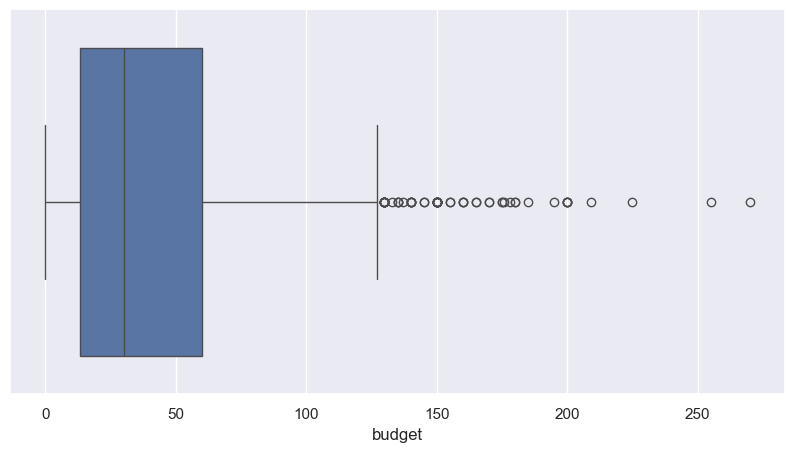

In [67]:
sns.set(rc={"figure.figsize":(10,5)})
sns.boxplot(data = df_remove_outliers, x= 'budget')
plt.show()


<Axes: xlabel='vote_count'>

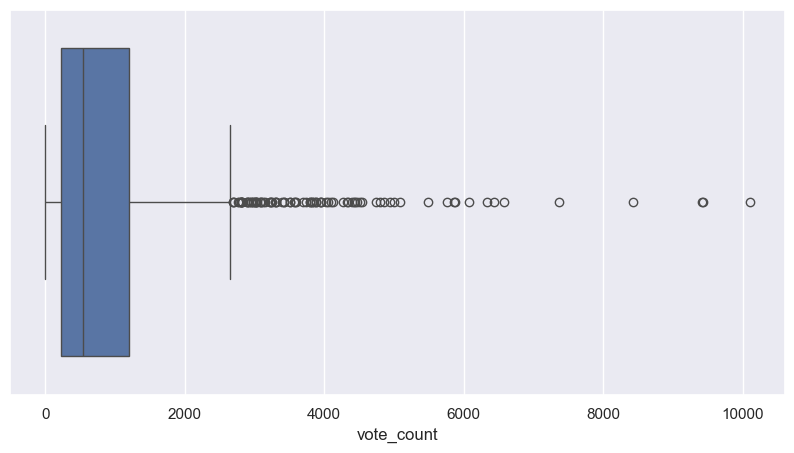

In [68]:
sns.boxplot(data = df_remove_outliers, x='vote_count')

In [69]:
df2 = pd.DataFrame({
    'Full_name': [' Alice Smith ','bob-jones','carol white','DAVID-MILLER',' Eve stone'],
    'birth_date': ['1998-04-12', '2001-11-23', '1995-12-23', '1999-01-30', '2000-03-15']
})

In [70]:
df2

,Full_name,birth_date
0,Alice Smith,1998-04-12
1,bob-jones,2001-11-23
2,carol white,1995-12-23
3,DAVID-MILLER,1999-01-30
4,Eve stone,2000-03-15


In [71]:
df2 ['birth_date']= pd.to_datetime(df2['birth_date'])

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Full_name   5 non-null      object        
 1   birth_date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 212.0+ bytes


In [73]:
df2['Full_name'] = df2['Full_name'].str.strip()
df2['Full_name'] = df2['Full_name'].str.replace('-',' ')
df2['Full_name'] = df2['Full_name'].str.title()
df2['First_name'] = df2['Full_name'].str.split().str[0]
df2['Last_name'] = df2['Full_name'].str.split().str[1]

In [74]:
df2

,Full_name,birth_date,First_name,Last_name
0,Alice Smith,1998-04-12,Alice,Smith
1,Bob Jones,2001-11-23,Bob,Jones
2,Carol White,1995-12-23,Carol,White
3,David Miller,1999-01-30,David,Miller
4,Eve Stone,2000-03-15,Eve,Stone


In [75]:
df2['year'] = df2['birth_date'].dt.year
df2['month'] = df2['birth_date'].dt.month
df2['day'] = df2['birth_date'].dt.day
df2['name_of_day'] = df2['birth_date'].dt.day_name()

In [76]:
df2

,Full_name,birth_date,First_name,Last_name,year,month,day,name_of_day
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday
2,Carol White,1995-12-23,Carol,White,1995,12,23,Saturday
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday


In [77]:
df2['age_in_2025'] = 2025 - df2['year']

In [78]:
df2

,Full_name,birth_date,First_name,Last_name,year,month,day,name_of_day,age_in_2025
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday,27
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday,24
2,Carol White,1995-12-23,Carol,White,1995,12,23,Saturday,30
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday,26
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday,25


In [79]:
df3 = pd.DataFrame({
    "dateTIME": pd.to_datetime(["2025-01-01 12:20:34", "2025-02-15 08:30:55", "2025-03-20 18:45:30"])
})

In [80]:
df3

,dateTIME
0,2025-01-01 12:20:34
1,2025-02-15 08:30:55
2,2025-03-20 18:45:30


In [81]:
df3["date_part"] = df3["dateTIME"].dt.date
df3["time_part"] = df3["dateTIME"].dt.time
df3["seconds"] = df3["dateTIME"].dt.second
df3["minute"] = df3["dateTIME"].dt.minute
df3["houers"] = df3["dateTIME"].dt.hour
df3["day_of_week"] = df3["dateTIME"].dt.day_name()

In [82]:
df3

,dateTIME,date_part,time_part,seconds,minute,houers,day_of_week
0,2025-01-01 12:20:34,2025-01-01,12:20:34,34,20,12,Wednesday
1,2025-02-15 08:30:55,2025-02-15,08:30:55,55,30,8,Saturday
2,2025-03-20 18:45:30,2025-03-20,18:45:30,30,45,18,Thursday


In [83]:
df3["plus_7_days"] = df3["dateTIME"] + pd.Timedelta(days=7)
df3

,dateTIME,date_part,time_part,seconds,minute,houers,day_of_week,plus_7_days
0,2025-01-01 12:20:34,2025-01-01,12:20:34,34,20,12,Wednesday,2025-01-08 12:20:34
1,2025-02-15 08:30:55,2025-02-15,08:30:55,55,30,8,Saturday,2025-02-22 08:30:55
2,2025-03-20 18:45:30,2025-03-20,18:45:30,30,45,18,Thursday,2025-03-27 18:45:30


In [84]:
df3["datediff"] = (df3["plus_7_days"] - df3["dateTIME"]).dt.days
df3

,dateTIME,date_part,time_part,seconds,minute,houers,day_of_week,plus_7_days,datediff
0,2025-01-01 12:20:34,2025-01-01,12:20:34,34,20,12,Wednesday,2025-01-08 12:20:34,7
1,2025-02-15 08:30:55,2025-02-15,08:30:55,55,30,8,Saturday,2025-02-22 08:30:55,7
2,2025-03-20 18:45:30,2025-03-20,18:45:30,30,45,18,Thursday,2025-03-27 18:45:30,7


In [85]:
df2["If_gen-z"] = np.where(df2["year"]>=1997, "gen-z", "millenial")
df2

,Full_name,birth_date,First_name,Last_name,year,month,day,name_of_day,age_in_2025,If_gen-z
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday,27,gen-z
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday,24,gen-z
2,Carol White,1995-12-23,Carol,White,1995,12,23,Saturday,30,millenial
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday,26,gen-z
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday,25,gen-z
